Jacqueline Sanchez <br>
June 25, 2024 <br> 
Homework 4

# Neural Networks

Your task for this homework will be to construct a neural network for both a regression
and classification task. We'll be using the california dataset for the regression portion,
and iris for classification.By the end of this hw you should be comfortable using sklearn'sneural network on a dataset.

In [1]:
# dataset importation
from sklearn.datasets import fetch_california_housing, load_iris

# libraries 
import pandas as pd
import numpy as np


# plotting tools
import seaborn as sb # to use rcParams
import matplotlib.pyplot as plt

# tools
from sklearn.pipeline import Pipeline

# model training tools
from sklearn.model_selection import train_test_split, GridSearchCV # split 
from sklearn.preprocessing import StandardScaler # scale, preprocessing



# models
# from sklearn.neural_network import MLPRegressor # for neural network (new)
from sklearn.neural_network import MLPClassifier 


# metric tools
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

In [2]:
from matplotlib import rcParams # need sb
rcParams['figure.figsize'] = 8, 5
sb.set_style('darkgrid')

## Artificial Neural Network for Regressional Task

### Part 1: Reading and Understanding the Data (Regression Part)

In [3]:
california_housing = fetch_california_housing()

# Convert the data into a pandas DataFrame
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Save the target into a variable y
y = california_housing.target

# Display the first few rows of the DataFrame to ensure it is loaded correctly
X.head(), y[:5]

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
 array([4.526, 3.585, 3.521, 3.413, 3.422]))

#### To Do: 

In [4]:
# 1. Print some basic statistics of your data
print(X.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [5]:
# 2. Print some general info using pandas 
print("Basic Information: ")
print(X.info())

print("\nData types of each column: ")
print(X.dtypes)

print("\nMissing values in the dataset: ")
print(X.isnull().sum())

Basic Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

Data types of each column: 
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

Missing values in the dataset: 
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


<span style = 'color:green'>
No, there are no missing values in this dataset as I added all the na values in the dataset but there were none. 

### Part 2 Visualization

Text(0.5, 1.0, 'y(house value) Distribution')

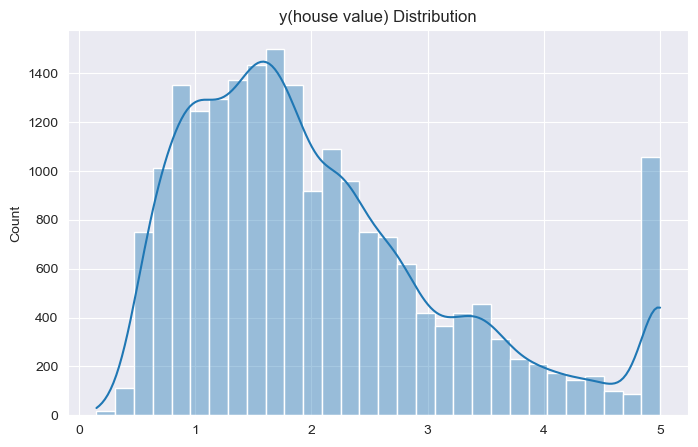

In [6]:
# histogram of the median house value(y)c

sb.histplot(y, bins = 30, kde = True, alpha = 0.4)
plt.title('y(house value) Distribution')

<span style = 'color : green'>
I can conclude that the data has low variance in house value as most of the house values fall within the mean range with a few outliers being the exception like the points right of the histogram.

### Part 2 Visualization

#### Scatter plot of the Population vs. House Value(y)

In [ ]:
plt.scatter(X['Population'], y,c = X['Population'], cmap = 'spring', marker = 'o', s = 100, alpha = 0.5)

<span style = 'color:green'>
I can conclude the where there are more population the value of the house are lower than the houses where there is more population. There are instances of ouliters across the range but noticibly there are two significant outliers that are farther away from the avegrage house value which are happen to be located where there is less population.

#### scatter plot of Longitude vs Latitude

In [ ]:
scatter = plt.scatter(X['Longitude'], X['Latitude'], c=y, cmap='magma', s=50, alpha=0.5)

# labels
plt.title('House Price on Basis of Geo-coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# color bar
cbar = plt.colorbar(scatter)
cbar.set_label('House Price')


plt.show()

<span style = 'color:green'>
Based on the scatter plot created, it is observed that latitude and longitude have a correlation relationship with one another, as indicated by the linear pattern formed in the plot.
There is a slight precence of variance notibly in the lower longitude and higher latitude section of the plot. 
<br>
    
This suggests that as one of these variables changes, the other tends to change in a predictable manner.

### Part 2 Visualization

#### Heatmap of the features

In [ ]:
X_copy = X.copy()
X_copy['target'] = y

# correlation matrix
correlation_matrix = X_copy.drop('target', axis=1).corr()

# plotting the heatmap
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Heatmap of Feature Correlation')
plt.show()

<span style='color:green'>
It is evident that the heatmap provides a clear visualization of the correlation values between each feature. From the heatmap, we can observe that latitude and longitude have the least correlation with each other. Therefore, we can consider removing these features to potentially improve the model's performance.

#### Scatter plot for ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'] vs. house value(y)

In [ ]:
# the chosen features vs house value
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']

# colors for plot
colors = ['blue', 'orange', 'green', 'red', 'purple']

# scatter plots using sb.regplot
for feature, color in zip(features, colors):
    plt.figure(figsize=(8, 6))
    sb.regplot(x=feature, y=y, data=X, scatter_kws={'color': color}, line_kws={'color': color})
    plt.title(f'Scatter Plot of {feature} vs. House Value')
    plt.xlabel(feature)
    plt.ylabel('House Value')
    plt.grid(True)
    plt.show()

<span style = 'color:green'>
The plots suggest that median income and the number of rooms per household are positively correlated with house values, while house age, average bedrooms, and average occupancy do not show a strong linear relationship with house values.

#### Histogram for HouseAge

In [ ]:
# histogram of the median house value(y)
sb.histplot(X['HouseAge'], bins = 30, kde = True, alpha = 0.4)
plt.title('Histogram for HouseAge')

### Part 3 Model Creation and Evaluation

* Perform the following

1. Scale the data

In [ ]:
# 1. scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features_df = pd.DataFrame(scaled_features, columns=X.columns)

# split train and test (test size of 0.30)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.30, random_state=42)

# neural network for regression using sklearn (hidden layers of size: 130->64->32->16)
mlp = MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Run the test data through the model to obtain predictions
predictions = mlp.predict(X_test)

# Calculate and print the R^2 score of this model
r2 = r2_score(y_test, predictions)
print(f'R² of the model: {r2}')

### Part 3: Model Creation and Evaluation

• How did your model perform? 

In [ ]:
#not so good 

• Try experimenting with different hidden layer sizes.

In [ ]:
# to keep consistency while applying the same transformation to both the training and test set, lets use pipeline
# reduce errors

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42))
])

# expererimenting different layers
param_grid = {
    'mlp_hidden_layer_sizes': [(130,), (130, 64), (130, 64, 32), (130, 64, 32, 16)],
    'mlp_activation': ['relu']
}

# finding the best set of parameters(using gridsearchCV)
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)


print(f'Best parameters: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f'R² of the model: {r2}')


In [ ]:
# DBSCAN (method 1)

In [ ]:
from sklearn.cluster import DBSCAN

# Function to check the number of points removed by DBSCAN with varying parameters
def check_outliers_removal(X, eps=0.5, min_samples=5):
    outlier_remover = DBSCAN(eps=eps, min_samples=min_samples)
    outlier_remover.fit(X)
    mask = outlier_remover.labels_ != -1
    print(f"Points removed: {len(X) - np.sum(mask)} out of {len(X)}")

# Visualize the data (assuming 2D data for simplicity)
def visualize_data(X, title="Data Visualization"):
    plt.scatter(X[:, 0], X[:, 1], s=5)
    plt.title(title)
    plt.show()

# Assuming X_train is defined and is a DataFrame
X_train = pd.DataFrame(X_train)
X_train_np = X_train.to_numpy()

# Visualize the original data
visualize_data(X_train_np, "Original Data")

# Test different DBSCAN parameters
check_outliers_removal(X_train, eps=1.0, min_samples=5)
check_outliers_removal(X_train, eps=1.5, min_samples=5)
check_outliers_removal(X_train, eps=0.5, min_samples=10)
check_outliers_removal(X_train, eps=0.5, min_samples=20)


In [ ]:
# PCA (method 2)

In [ ]:
from sklearn.decomposition import PCA

# Assuming X_train and y_train are defined and are NumPy arrays or DataFrames
X_train = pd.DataFrame(X_train)  # Convert to DataFrame if not already
y_train = pd.Series(y_train)  # Convert to Series if not already

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization and distance calculation
X_pca = pca.fit_transform(X_train)

# Calculate the Euclidean distance from the origin in the PCA-transformed space
distance = np.sqrt(np.sum(X_pca**2, axis=1))

# Define a threshold for outliers (e.g., points beyond 3 standard deviations from the mean)
threshold = np.mean(distance) + 3 * np.std(distance)
outliers = distance > threshold

# Filter out the outliers
X_train_no_outliers = X_train[~outliers]
y_train_no_outliers = y_train[~outliers]

# Ensure X_test is also a DataFrame for consistent handling
X_test = pd.DataFrame(X_test)
y_test = pd.Series(y_test)

# Setup the pipeline with Isolation Forest outlier remover
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'mlp__hidden_layer_sizes': [(130,), (130, 64), (130, 64, 32), (130, 64, 32, 16)],
    'mlp__activation': ['relu']
}

# Set up GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')

try:
    grid_search.fit(X_train_no_outliers, y_train_no_outliers)

    # Output the best parameters
    print(f'Best parameters: {grid_search.best_params_}')

    # Use the best model to make predictions on the test set
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)

    # Calculate and print the R² score
    r2 = r2_score(y_test, predictions)
    print(f'R² of the model: {r2}')
except ValueError as e:
    print(f"Error during grid search: {e}")


by viewing at the original data seem to have a lot variation which by removing a lot of datapoints could have potentially reduce the training sample size significantly. After applying PCA

In [ ]:
# DVSCAN: can even worsen down the dimensionality 

In [ ]:
# Assuming X and y are your DataFrame with features and target respectively
# Calculate IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
X_clean = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_clean = y[X_clean.index]

# Split the cleaned data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'mlp__hidden_layer_sizes': [(130,), (130, 64), (130, 64, 32), (130, 64, 32, 16)],
    'mlp__activation': ['relu']
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate the R² score
r2 = r2_score(y_test, predictions)
print(f'R² of the model: {r2}')

# Part 4 (Classification Part)

### Reading and Understanding the data

In [ ]:
# dataset importation
from sklearn.datasets import load_iris


iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target

### Print some basic statistics of your data

In [ ]:
# 1. Print some basic statistics of your data
print(X.describe())

### general information using pandas

In [ ]:
# 2. Print some general info using pandas 
print("Basic Information: ")
print(X.info())

print("\nData types of each column: ")
print(X.dtypes)

print("\nMissing values in the dataset: ")
print(X.isnull().sum())

<span style = 'color:green'> 
No, there are no missing values in the iris dataset because the sum of all x.isnull() value are 0. 

## Iris Pairplot

In [ ]:
# pair plot
# sb.pairplot(iris_df, hue = 'species')

# sb.pairplot(iris_df, hue='species', palette='bright', markers=["o", "s", "D"])

sb.pairplot(iris_df)
plt.show()

In [ ]:
print(iris_df.dtypes)

## Boxplot of species on the x-axis and sepal length (cm) on the Y-axis

In [ ]:
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# converting n̶u̶m̶e̶r̶i̶c̶a̶l̶ object label to categorical variable
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Define a custom color palette
colors = ['lightblue', 'orange', 'limegreen']

# Create the boxplot and assign `species` to `hue`
plt.figure(figsize=(10, 6))
sb.boxplot(x='species', y='sepal length (cm)', hue='species', data=iris_df, palette=colors, dodge=False)
plt.title('Species v.s. Sepal Length Box Plots')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# print(iris_df.dtypes)

### What can you conclude from the plots you created? 

<span style='color:green'>
    
I can see that all three species have a nearly balanced data proportion with respect to Sepal Length by species. This suggests similar central tendencies in Sepal Length across Setosa, Versicolor, and Virginica. **However, Virginica is the only species with an outlier below the lower quartile, indicating potential variability or an extreme value in Sepal Length measurements within this species.**


## Boxplot of species on the x-axis and sepal width(cm) on the y-axis

In [ ]:
# Define a custom color palette
colors = ['lightblue', 'orange', 'limegreen']

# Create the boxplot and assign `species` to `hue`
plt.figure(figsize=(10, 6))
sb.boxplot(x='species', y='sepal width (cm)', hue='species', data=iris_df, palette=colors, dodge=False)
plt.title('Species v.s. Sepal Width Box Plots')
plt.xlabel('Species')
plt.ylabel('Sepal width (cm)')
plt.legend(loc='upper left')
plt.show()

### What can you conclude from the plots you created?

<span style='color:green'>
In analyzing the boxplot for Sepal Width across species, I observed that Setosa and Virginica exhibit outliers at both ends of the whiskers, indicating significant variability in Sepal Width measurements within these species. In contrast, Versicolor shows a narrower distribution without outliers, suggesting more consistent Sepal Width measurements. This variability across species highlights the need for further investigation into the factors influencing Sepal Width variability in Setosa and Virginica compared to Versicolor.



## Boxplot of species on the x-axis and petal width(cm) on the y-axis 

In [ ]:
# Define a custom color palette
colors = ['lightblue', 'orange', 'limegreen']

# Create the boxplot and assign `species` to `hue`
plt.figure(figsize=(10, 6))
sb.boxplot(x='species', y='petal width (cm)', hue='species', data=iris_df, palette=colors, dodge=False)
plt.title('Species v.s. petal width Box Plots')
plt.xlabel('Species')
plt.ylabel('Petal width (cm)')
plt.legend(loc='upper left')
plt.show()

<span style='color:green'>
    
Setosa seems to have the smallest range in petal width compared to its counterparts, Versicolor and Virginica, indicating very consistent measurements within this species with a few exceptions indicated by outliers at the upper quartile end of the whiskers. This suggests that a few Setosa specimens have wider petals than the typical range. <br>
    
Versicolor has a wider range in petal width than Setosa but less than Virginica, indicating moderate variability. Virginica has the widest range of petal width among the three species, indicating greater variability and consistently wider petals compared to the other species.

## Scatterplot of sepal length (cm) vs. sepal width (cm) 

In [ ]:
plt.figure(figsize=(10, 6))

sb.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris_df, palette='Set1', s=30, alpha=0.8)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species', loc='upper right')
plt.show()

### What can you conclude from the plots you created?

<span style = 'color:green'> 

Setosa: There is a significant cluster of setosa in the left upper side of the scatter plot, indicating that setosa species have relatively smaller sepal lengths but larger sepal widths with respect to their margin location. This makes setosa distinct and easily identifiable compared to the other species.

Versicolor: Versicolor are spread in the mid-range of the graph, showing more variability in their sepal measurements. This spread indicates that versicolor species have a wider range of sepal lengths and widths.

Virginica: Virginica occupy a higher range of sepal lengths and have sepal widths similar to versicolor. This indicates that virginica species generally have longer sepals. Additionally, virginica has longer petals.

In [ ]:
# extract features and target
X = data.drop('species', axis=1)
y = data['species'] # target

# 1. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# 3. create a neural network
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', max_iter=1000, random_state=42)

# 4. train the neural network
mlp.fit(X_train, y_train)

# 5. predict on the test set
predictions = mlp.predict(X_test)

# evaluating the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


### How did your model perform? 

<span style='color:green'>
    
The model performed exceptionally well. All the scores for precision, recall, and F1 for all three classes are 1.0, which indicates that the model is perfectly accurate for each class. The overall accuracy of the model is 100%. 

<br>
As for the confusion matrix, it shows that the model classified each class correctly, as each class has an entry for true positives, meaning that all instances were classified correctly according to their respective classes.



### Try experimenting with different hidden layer sizes

In [ ]:
# Extract features and target
X = data.drop('species', axis=1)
y = data['species']

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# List of different hidden layer configurations to try
hidden_layer_sizes_list = [
    (128, 64, 32),
    (512, 256, 128),
    (128, 128, 128, 128)
]

# Function to evaluate model performance
def evaluate_model(hidden_layer_sizes):
    print(f"Evaluating model with hidden layers: {hidden_layer_sizes}")
    # Step 3: Create a neural network
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, 
                        activation='relu', 
                        max_iter=1000, random_state=42)

    # Step 4: Train the neural network
    mlp.fit(X_train, y_train)

    # Step 5: Predict on the test set
    predictions = mlp.predict(X_test)

    # Evaluate the model
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

# Evaluate each configuration
for hidden_layer_sizes in hidden_layer_sizes_list:
    evaluate_model(hidden_layer_sizes)

### Try using gridsearchCV to find the best set of parameters

In [ ]:
# Extract features and target
X = data.drop('species', axis=1)
y = data['species']

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(128, 64, 32), (512, 256, 128), (128, 128, 128, 128)],
    'activation': ['relu'],
    'max_iter': [1000],
    'random_state': [42]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Step 3: Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Step 4: Evaluate the best model
best_model = grid_search.best_estimator_

# Step 5: Predict on the test set
predictions = best_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
# lets try using piping together the preprocessing aspect and estimator 

# Extract features and target
X = data.drop('species', axis=1)
y = data['species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'mlp_hidden_layer_sizes': [(128, 64, 32), (512, 256, 128), (128, 128, 128, 128)],
    'mlp_activation': ['relu']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_

# Predict on the test set
predictions = best_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) #intersting

### Save any cells use for experimenting so that we can see what you tried ↑

<span style='color:green'>
Even though the same list of hidden layer sizes and configurations was used for both models through a pipeline, GridSearchCV identified different best parameter groupings. Nevertheless, the models' performances were similar, indicating that multiple hyperparameter configurations can produce equivalent results.
    

<br>
This emphasizes the flexibility and robustness of the neural network in adapting to various hyperparameter settings. It also emphasizes the importance of hyperparameter tuning, revealing that several optimal solutions may exist. Consistently applying preprocessing steps through a pipeline is crucial for maintaining the integrity of the model training and evaluation process.








### What works best for this model? 

<span style='color:green'>
    
For these models, without using the pipeline technique, the best hidden layer sizes are (128, 64, 32). When using the pipeline technique, the best hiddent layer sizes are (512, 256, 128). Both scored an accuracy socre of 0.98

In [ ]:
# Confusion Matrix 

In [ ]:
# extract features and target
X = data.drop('species', axis=1)
y = data['species']

# 1. scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# hidden layers determined by using paramGrid
hidden_layer_sizes = (128, 64, 32)

# create and train the neural network
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# predict on the test set
predictions = mlp.predict(X_test)

# create and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

conf_matrix

### This is the confusion matrix for the original model before experimenting with different layer sizes

In [ ]:
# extract features and target
X = data.drop('species', axis=1)
y = data['species'] # target

# 1. scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# 3. create a neural network
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', max_iter=1000, random_state=42)

# 4. train the neural network
mlp.fit(X_train, y_train)

# 5. predict on the test set
predictions = mlp.predict(X_test)

# evaluating the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# create and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()